# zu Aufgabe 1:

Aus gemessenen Werten der Totalintensität lassen sich sehr leicht Magnetfeld-Anomalien berechnen. Zur räumlichen Auswertung werden diese häufig in Karten dargestellt und die Stärke des Magnetfelds mit Isolinien (Linien gleicher Magnetfeldstärke, analog zu Höhenlinien in einer Karte). 

Das untenstehende Skript berechnet eine einfache Isolinienkarte für die Punkte, die durch ihre Koordinaten (x,y) (in m) und die lokale relative Magnetfeldstärke (Variable *meas* in nT ) gegeben sind. 
Führen Sie die ersten beiden Zellen aus und beantworten Sie die Fragen in Aufgabe 1 auf Übungsblatt 13.

In [3]:
''' Berechnet eine Isolinienkarte für Punkte (x,y) und Messwerte für Feldanomalien (Gravimetrie, Magnetik) 

    © Nepomuk Boitz, April 2020, boitz@geophysik.fu-berlin.de
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from matplotlib import cm

# Messwerte in nT
meas = np.array([40 ,30 ,70 ,20 ,50, 70, 110, 60, 110, 70, 40, 110, 90, 110])

# Messkoordinaten in m
x = np.array([1 ,3 ,5 ,6 ,7 ,9 ,10 ,11 ,12 ,14 ,15 ,6 ,0 ,4])*10 ;
y = np.array([4 ,8 ,5 ,10 ,1 ,3 ,6 ,9 ,4 ,7 ,3 ,7 ,0 ,2])*10; 

# Profillinie

profil_x = np.array([20,140])
profil_y = np.array([0,100])

print("Fertig! Bitte nächste Zelle ausführen.")

Fertig! Bitte nächste Zelle ausführen.


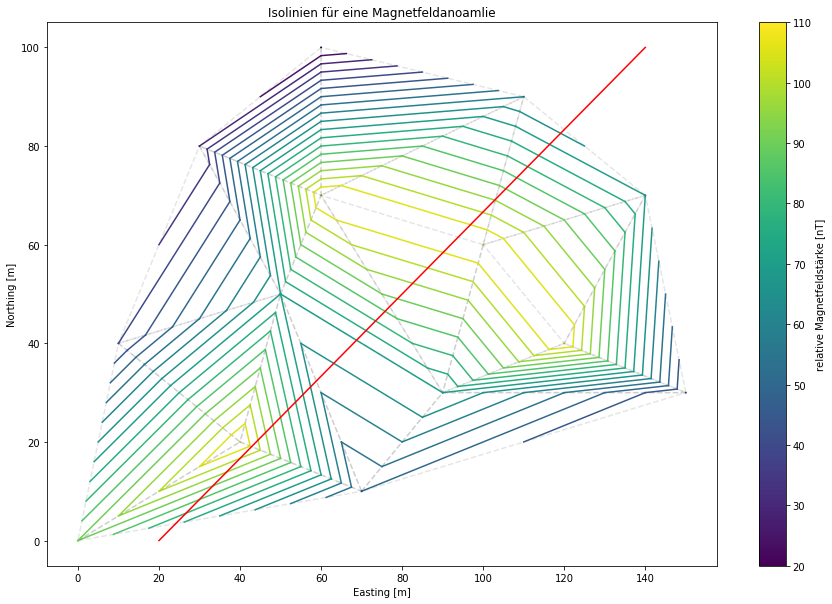

In [4]:

## Ab hier nichts mehr verändern

def get_crossing_point(p1,p2,m1,m2):
    # m1,p1: Profil
    # m2,p2: Isolinie
    if (m2[1]*m1[0] - m2[0]*m1[1]) != 0:
        a = ((p2[0]-p1[0])*m1[1] - (p2[1]-p1[1])*m1[0])/(m2[1]*m1[0] - m2[0]*m1[1])
        cx = p2[0] + a*m2[0]
        cy = p2[1] + a*m2[1]
        #x = np.array([p1[0],cx,p2[0]])
        #y = np.array([p1[1],cy,p2[1]])
        if a < 0:
            if (cx > min(p2[0],p2[0]-m2[0])) and (cx < max(p2[0],p2[0]-m2[0])) and (cy > min(p2[1],p2[1]-m2[1])) and (cy < max(p2[1],p2[1]-m2[1])):
                return [cx,cy,a]
                #return []
        return []
    else:
        print('doof')
        return []
    
m_line = np.array([profil_x[1] - profil_x[0],profil_y[1] - profil_y[0]])
p_line = np.array([profil_x[0],profil_y[0]])

profl = np.array([0,0,0,0])
pos = np.vstack((x,y)).T

line_spacing = 5
tri = Delaunay(pos); 
tri_dat = tri.simplices; 
c_p = 64; 
viridis = cm.get_cmap('viridis', c_p)
t = 0; 
plt.figure(figsize=(15,10))
all_x = np.array([0,0])
all_y = np.array([0,0])
all_c = np.array([0])
for triangle in range(np.shape(tri.simplices)[0]):
    points = np.array([])
    x_s = np.array([])
    y_s = np.array([])
    z_s = np.array([])
    for vertex in range(3):
        x1 = ((vertex-1)%3)
        x2 = (vertex%3)
        steps = int(abs(meas[tri_dat[triangle,x1]] - meas[tri_dat[triangle,x2]])/ line_spacing); 
        x_s = np.append(x_s,np.linspace(x[tri_dat[triangle,x1]],x[tri_dat[triangle,x2]],steps+1));
        y_s = np.append(y_s,np.linspace(y[tri_dat[triangle,x1]],y[tri_dat[triangle,x2]],steps+1));
        z_s = np.append(z_s,np.linspace(meas[tri_dat[triangle,x1]],meas[tri_dat[triangle,x2]],steps+1),axis=0);
    plt.plot(x_s,y_s,'k--',alpha=.1)
    points = np.vstack((x_s,y_s,z_s))
    vec = np.arange(np.min(z_s), np.max(z_s), line_spacing)
    for i in vec:
        sub_points = points[:,points[2,:]==i];
        n_len = np.shape(sub_points)[1];
        sub_points = np.unique(sub_points, axis=1)
        if np.shape(sub_points)[1] == 2:
            x_p = np.array([sub_points[0,0], sub_points[0,1]])
            y_p = np.array([sub_points[1,0], sub_points[1,1]])
            c = (sub_points[2,0] - np.min(meas))/(max(meas) - min(meas))
            plt.plot(x_p,y_p,'-',color=viridis(c))
            m_iso = np.array([x_p[0] - x_p[1],y_p[0] - y_p[1]])
            p_iso = np.array([x_p[0],y_p[0]])
            cross =  get_crossing_point(p_line,p_iso,m_line,m_iso)
            if len(cross) > 0:
                profl = np.vstack((profl,np.array([cross[0],cross[1],cross[2],sub_points[2,0]])))
            
            all_x = np.vstack((all_x,x_p))
            all_y = np.vstack((all_y,y_p))
            all_c = np.vstack((all_c,sub_points[2,0]))
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.plot(profil_x,profil_y,'r-')
plt.scatter(x,y,1,meas)
cbar = plt.colorbar()
cbar.set_label('relative Magnetfeldstärke [nT]', rotation=90)
plt.title('Isolinien für eine Magnetfeldanoamlie')
plt.show()

# zu Aufgabe 2:
Indem Sie das Skript unten ausführen erzeugen Sie ein Profil der gemessenen Magnetfeldwerte entlang der roten Line aus der Abbildung oben. Beantworten Sie die Fragen zu Aufgabe 2 auf Übungsblatt 13. Setzen Sie dafür den dritten Messwert wieder auf 70 nT.

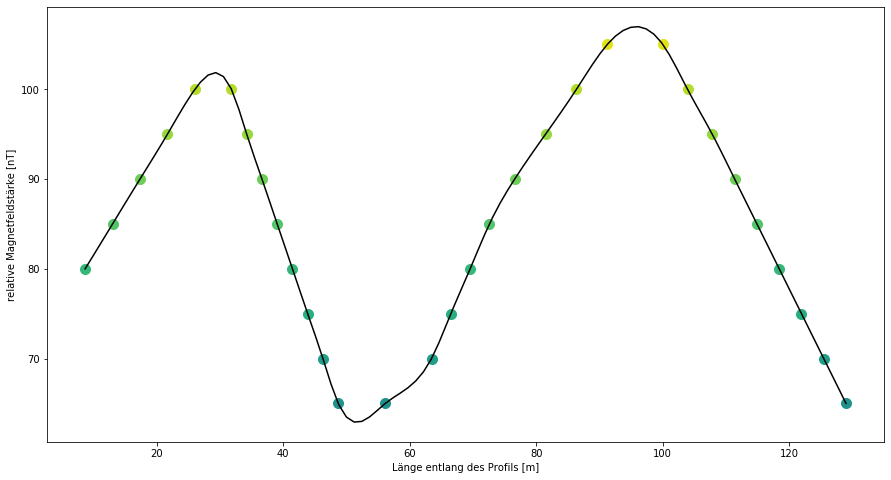

In [4]:
from scipy.interpolate import interp1d

plt.figure(figsize=(15,8))
r = np.zeros([np.shape(profl)[0]-1,2])
for i in range(np.shape(profl)[0]-1):
    r[i-1,0] = np.sqrt((profil_x[0] - profl[i+1,0])**2 + (profil_y[0] - profl[i+1,1])**2)
    r[i-1,1] = profl[i+1,3]
    c = (profl[i+1,3] - np.min(meas))/(max(meas) - min(meas))
    plt.plot(r[i-1,0],r[i-1,1],'.',color=viridis(c),markersize=20)
plt.ylabel('relative Magnetfeldstärke [nT]')
plt.xlabel('Länge entlang des Profils [m]')

r = r[r[:,0].argsort(),]
f = interp1d(r[:,0],r[:,1],kind='cubic')
x = np.linspace(min(r[:,0]),max(r[:,0]),100)
y = f(x)
plt.plot(x,y,'k-')
plt.show()
